In [23]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
from scipy.spatial.distance import pdist
import scipy.sparse.linalg
import pandas as pd
%matplotlib inline

def kcenterize(K):
    rowave = K.mean(0).reshape(1,n)
    colave = K.mean(1).reshape(n,1)
    matave = K.mean()*np.ones((n,n))
    K= K - rowave - colave + matave
    return K

def normalize(U,D):
    n=len(U[0])
    normA =U/np.sqrt(np.abs(D)).reshape(1,n)
    normA = normA/np.sqrt(n)
    return normA

class kPCA:
    def __init__(self, K):
        # X's shape (items,dimensions)
        centered = kcenterize(K)

        (eig_values, eig_vectors) = np.linalg.eigh(centered)
        idx = np.argsort(-eig_values)
        eig_vectors = eig_vectors[:,idx]
        eig_values = eig_values[idx]
        eig_vectors = normalize(eig_vectors,eig_values)
        (self.eig_values, self.eig_vectors) = (eig_values, eig_vectors)
        
    def project(self, X):
        # X's shape (items,dimensions)
        return np.dot(X, self.eig_vectors)


## 4.1 Kernel PCA: Toy Data (10 points)

(a) Create a toy dataset of 2-dimensional data points x(α) = (x( 1α), x( 2α)), α = 1,...,90. The points represent iid samples of 30 points from 3 different distributions with uncorrelated, normally distributed (sd=0.1) coordinate values differing only in their mean value. The first sample (α = 1,...,30) should be centered on hx(α)i1 = (−0.5,−0.2), the second (α = 31,...,60) on hx(α)i2 = (0, 0.6), and the third (α = 61,...,90) on hx(α)i3 = (0.5, 0).

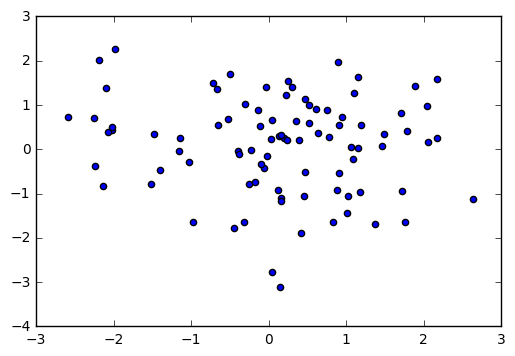

In [24]:

fst=np.random.randn(30,2)+np.array([-0.5,-0.2])
snd=np.random.randn(30,2)+np.array([0.,0.6])
thd=np.random.randn(30,2)+np.array([0.5,0.])
training_data= np.append(np.append(fst,snd,0),thd,0)
plt.scatter(training_data[:,0],training_data[:,1])

b) Apply a Kernel PCA using the RBF kernel (see below) with a suitable parameter value
for the width σ of the kernel and calculate the coefficients for the representation of the
eigenvectors (PCs) in the space spanned by the transformed data points.

RBF Kernel:

$$ k(x^{(\alpha)},x^{(\beta)})) = \exp\left(-\frac{||x^{(\alpha)}-x^{(\beta)}||^2}{2 \sigma^2} \right) $$

In [25]:
n = 90
sigma = 2
X1 = (training_data**2).sum(1) + np.zeros([n,1])
D1 = X1 - 2*(training_data.dot(training_data.T)) + X1.T
K = np.exp(D1/(2*sigma**2))
# kernel centlies

kpca = kPCA(K)
kpca.eig_values

array([  1.12583709e+02,   4.03082166e+01,   2.92970022e+01,
         1.21845770e+00,   7.97713912e-01,   5.51582203e-01,
         2.38605947e-01,   1.06134036e-01,   8.04536681e-03,
         5.89700546e-03,   1.94300595e-03,   1.38152728e-03,
         8.08943535e-04,   4.55347345e-04,   1.36816335e-04,
         8.33585946e-06,   2.29045744e-06,   1.57695224e-06,
         1.31639415e-06,   4.49380450e-07,   4.22895019e-07,
         2.30029016e-07,   8.90257939e-08,   2.92294530e-08,
         5.96209075e-10,   3.96206735e-10,   1.52440151e-10,
         5.25288602e-11,   4.65609698e-11,   2.54782692e-11,
         1.71600969e-11,   4.17395918e-12,   2.73837381e-12,
         1.27805213e-12,   2.74773471e-13,   1.16225319e-14,
         7.16640552e-15,   5.41460862e-15,   3.36529710e-15,
         1.55574146e-15,   9.14743757e-16,   6.95123168e-16,
         1.45253259e-16,  -3.45967586e-18,  -1.95782421e-16,
        -4.53447549e-16,  -1.03504272e-15,  -2.92478039e-15,
        -3.32696955e-15,

(c) Visualize the first 8 PCs in the 2-dimensional input space in the following way: 

In [15]:
x = np.linspace(-4.,4,90)
y = np.linspace(-4.,4,90)

X, Y = np.meshgrid(x, y)


grid_points = len(X)
XY = np.append(X.reshape(n,n,1),Y.reshape(n,n,1),2)
XY=XY.reshape(n*n,2)
#KK=np.empty((n*n,n))

X2 = (training_data**2).sum(1).reshape(n,1)*np.ones((n,n*n))
U2 = (XY**2).sum(1).reshape(1,n*n) * np.ones([n,n*n])
D = X2 - 2*(training_data.dot(XY.T)) + U2
KK = np.exp(D.T/(2*sigma**2))
Z=KK.dot(kpca.eig_vectors[:,:8]).reshape(n,n,8)

In [16]:
Z.shape

(90, 90, 8)

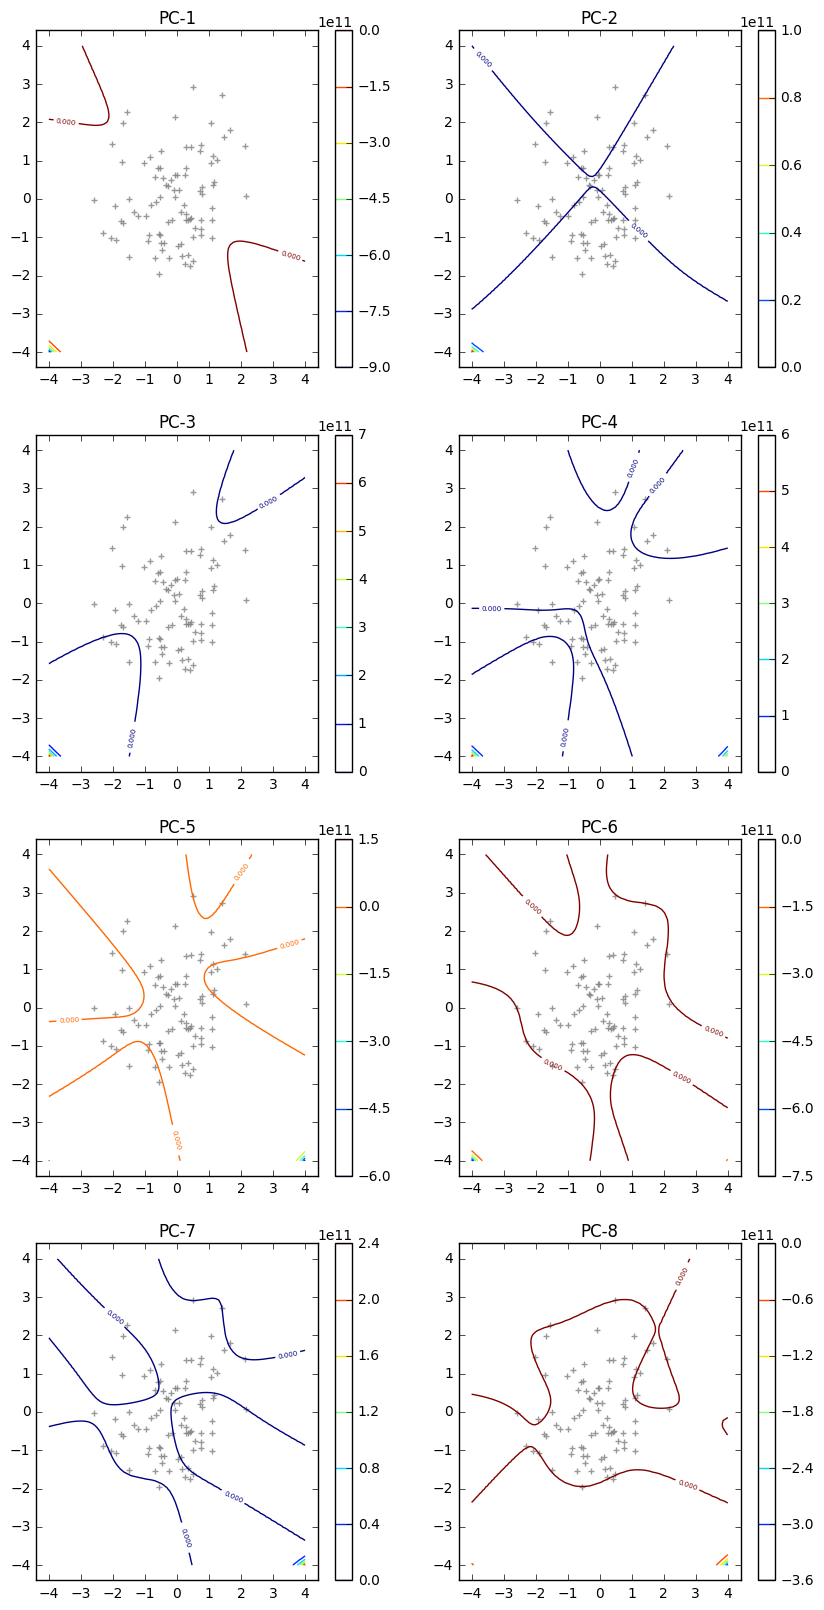

In [17]:


plt.figure(figsize=(10,20))
for i in range(8):
    plt.subplot(4,2,i+1)
#     plt.imshow(Z, extent=[-grid_space, grid_space, -grid_space, grid_space])
    ct = plt.contour(X,Y,Z[:,:,i])
    plt.clabel(ct, inline=1, fontsize=5)
    plt.colorbar()
    plt.title("PC-%d" % (i+1))
    plt.scatter(training_data[:,0], training_data[:,1], color='grey', marker='+', alpha=0.8)

